In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data.csv")
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [25]:
df.isnull().sum().sort_values()

Country      0
Purchased    0
Age          1
Salary       1
dtype: int64

In [14]:
df.shape

(10, 4)

In [13]:
df.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [22]:
df.describe().round(2)

,Age,Salary
count,9.00,9.00
mean,38.78,63777.78
std,7.69,12265.58
min,27.00,48000.00
25%,35.00,54000.00
50%,38.00,61000.00
75%,44.00,72000.00
max,50.00,83000.00


In [26]:
df.drop_duplicates()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [48]:
df["Salary"] = df["Salary"].fillna(value=df.describe().iloc[1].round(2))

In [52]:
df["Age"] = df["Age"].fillna(value=df.describe().iloc[1].round(2))
#df["Age"] = df["Age"].fillna(value=df.describe().loc['mean']['Age'].round(2))

In [49]:
df

,Country,Age,Salary,Purchased
0,France,44.00,72000.00,No
1,Spain,27.00,48000.00,Yes
2,Germany,30.00,54000.00,No
3,Spain,38.00,61000.00,No
4,Germany,40.00,63777.78,Yes
5,France,35.00,58000.00,Yes
6,Spain,38.78,52000.00,No
7,France,48.00,79000.00,Yes
8,Germany,50.00,83000.00,No
9,France,37.00,67000.00,Yes


In [47]:
df.describe().iloc[1]

Age          38.778
Salary    63777.778
Name: mean, dtype: float64

In [51]:
df.describe().loc['mean']['Age']

38.778

In [83]:
# For particular column

q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)

iqr = q3 - q1

lb = q1 - (1.5 * iqr)
ub = q3 + (1.5 * iqr)

print("Lower Bound: ",lb)
print("Upper Bound: ",ub)

print("Outliers : \n")

outliers = df[(df["Age"] < lb) | (df["Age"] > ub)]
outliers

Lower Bound:  24.25
Upper Bound:  54.25
Outliers : 



,Country,Age,Salary,Purchased


In [92]:
# For all columns that contains numerical values

Q1 = df.select_dtypes(include="number").quantile(0.25)
Q3 = df.select_dtypes(include="number").quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - (1.5 * IQR)
UB = Q3 + (1.5 * IQR)

print("Lower Bound: \n",LB)
print("Upper Bound: \n",UB)
Outliers1 = df[(df["Age"] < LB.loc["Age"]) | (df["Age"] > UB.loc["Age"])]
Outliers2 = df[(df["Salary"] < LB.loc["Salary"]) | (df["Salary"] > UB.loc["Salary"])]

Lower Bound: 
 Age          24.25
Salary    31375.00
dtype: float64
Upper Bound: 
 Age          54.25
Salary    94375.00
dtype: float64


[]

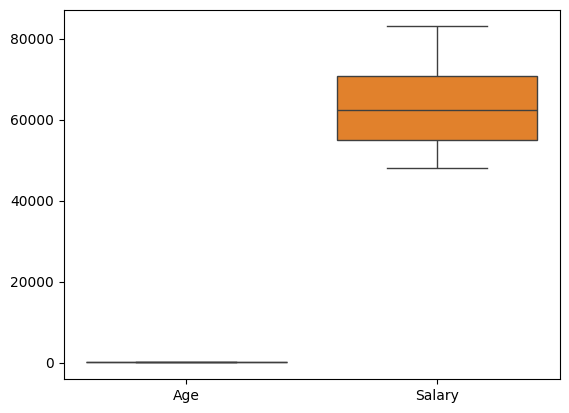

In [104]:
sns.boxplot(data=df.select_dtypes(include="number"))
plt.plot()

In [107]:
df1 = pd.read_csv("ecommerce_customers_unit1.csv")
df1

,customer_id,age,gender,country,signup_date,last_purchase_date,num_orders,total_spent,avg_order_value,recency_days,is_premium_member,device_type,preferred_category,churned
0,10001,56.0,Male,India,2022-01-27,2024-04-27,10,13273.25,1327.32,522,0,NaN,Home,0
1,10002,69.0,Other,UK,2025-01-12,2025-08-01,10,NaN,308.90,61,0,Mobile,Grocery,0
2,10003,46.0,Female,USA,2021-04-25,2021-06-01,5,3411.83,682.37,1583,0,NaN,NaN,0
3,10004,32.0,Male,India,2021-02-23,2023-09-22,5,4502.00,900.40,740,0,NaN,NaN,0
4,10005,60.0,Female,India,2021-06-07,2021-12-11,7,3842.10,548.87,1390,0,Tablet,Books,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,10358,25.0,Female,India,2023-09-04,2025-06-18,7,NaN,0.00,105,1,Mobile,Electronics,0
601,10117,50.0,Male,USA,2024-05-11,2024-11-08,4,3640.07,910.02,327,0,Mobile,Electronics,0
602,10599,46.0,Male,India,2020-12-01,2024-06-25,6,2176.22,362.70,463,1,Desktop,Electronics,0
603,10442,32.0,Female,UK,2023-12-20,2024-09-20,3,5478.65,1826.22,376,0,Mobile,Home,0


In [108]:
df1.isnull().sum()

customer_id            0
age                   28
gender                34
country               32
signup_date            0
last_purchase_date     0
num_orders             0
total_spent           34
avg_order_value        0
recency_days           0
is_premium_member      0
device_type           30
preferred_category    22
churned                0
dtype: int64

In [114]:
df1.drop_duplicates()

,customer_id,age,gender,country,signup_date,last_purchase_date,num_orders,total_spent,avg_order_value,recency_days,is_premium_member,device_type,preferred_category,churned
0,10001,56.0,Male,India,2022-01-27,2024-04-27,10,13273.25,1327.32,522,0,NaN,Home,0
1,10002,69.0,Other,UK,2025-01-12,2025-08-01,10,NaN,308.90,61,0,Mobile,Grocery,0
2,10003,46.0,Female,USA,2021-04-25,2021-06-01,5,3411.83,682.37,1583,0,NaN,NaN,0
3,10004,32.0,Male,India,2021-02-23,2023-09-22,5,4502.00,900.40,740,0,NaN,NaN,0
4,10005,60.0,Female,India,2021-06-07,2021-12-11,7,3842.10,548.87,1390,0,Tablet,Books,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,10596,67.0,Male,USA,2022-12-23,2023-04-28,10,12831.97,1283.20,887,0,Desktop,Electronics,0
596,10597,62.0,Female,India,2025-02-17,2025-09-27,7,2587.58,369.65,4,0,Mobile,Home,0
597,10598,28.0,Male,USA,2022-07-12,2025-01-17,2,2482.97,1241.48,257,0,NaN,Books,1
598,10599,46.0,Male,India,2020-12-01,2024-06-25,6,2176.22,362.70,463,1,Desktop,Electronics,0
